In [2]:
#Import libraries

import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Load the data set
housing = fetch_california_housing()

In [9]:
#Create training, validation and testing data set
X_train_full, X_test, y_train_full, y_test =  train_test_split(housing.data, housing.target)
X_train, x_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'X_valid: {x_valid.shape}')
print(f'X_train: {y_train.shape}')
print(f'X_test: {y_test.shape}')
print(f'X_valid: {y_valid.shape}')

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
X_train: (11610,)
X_test: (5160,)
X_valid: (3870,)


In [11]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = scaler.transform(X_test)
x_valid = scaler.transform(x_valid)

In [14]:
# Create neural network model
model = keras.models.Sequential([ keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]), keras.layers.Dense(1)
])

In [16]:
#Compile the model:
model.compile(loss = 'mean_squared_error',
              optimizer = 'sgd',
              metrics = [keras.metrics.RootMeanSquaredError(),
              'mean_absolute_percentage_error'
            ])

In [17]:
#Train the model
history = model.fit(X_train, y_train,
                    epochs = 10,
                    validation_data = (x_valid,))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.0046 - root_mean_squared_error: 1.0023 - mean_absolute_percentage_error: 39.7771 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00 - val_mean_absolute_percentage_error: 0.0000e+00
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.7274 - root_mean_squared_error: 1.3143 - mean_absolute_percentage_error: 36.2575 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00 - val_mean_absolute_percentage_error: 0.0000e+00
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4649 - root_mean_squared_error: 0.6818 - mean_absolute_percentage_error: 28.4018 - val_loss: 0.0000e+00 - val_root_mean_squared_error: 0.0000e+00 - val_mean_absolute_percentage_error: 0.0000e+00
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4287 - root_mean_squared_error: 0.6547 - mean_absolute_percentage_error: 26.8702 - val_loss: 0.0000e+00 - val_r

<Axes: >

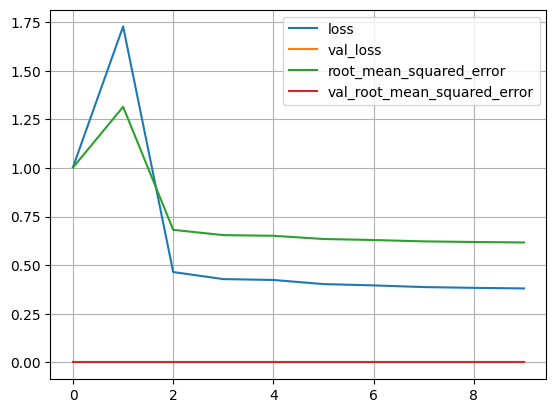

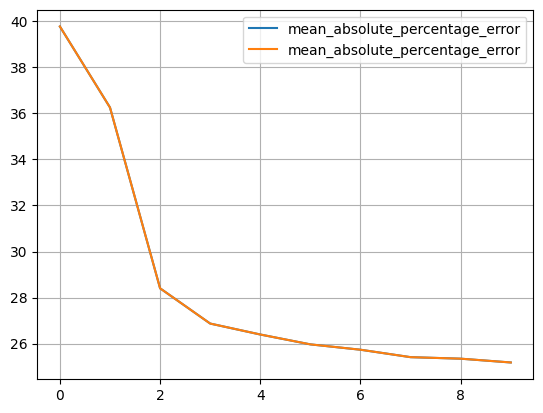

In [19]:
#Graph training history
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error',
           'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error',
           'mean_absolute_percentage_error']].plot(grid = True)

In [23]:
#Evaluate the model on the training set
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print(f'loss train: ', loss)
print(f'root_mean_squared_error train: {RMSE}')
print(f'root_mean_squared_error train: {MAPE}')

363/363 [==============================] - 1s 1ms/step - loss: 0.3830 - root_mean_squared_error: 0.6189 - mean_absolute_percentage_error: 25.6121
Evaluar el modelo en el conjunto de entrenamiento
loss train:  0.38298138976097107
root_mean_squared_error train: 0.6188548803329468
root_mean_squared_error train: 25.612070083618164


In [25]:
#Evaluate the model on the validation set
loss, RMSE, MAPE = model.evaluate(x_valid, y_valid)
print("Evaluar el modelo en el conjunto de entrenamiento")
print(f'loss loss: ', loss)
print(f'root_mean_squared_error valid: {RMSE}')
print(f'root_mean_squared_error valid: {MAPE}')

121/121 [==============================] - 1s 6ms/step - loss: 0.4284 - root_mean_squared_error: 0.6545 - mean_absolute_percentage_error: 25.9261
Evaluar el modelo en el conjunto de entrenamiento
loss loss:  0.4283941686153412
root_mean_squared_error valid: 0.6545182466506958
root_mean_squared_error valid: 25.926057815551758
